**📊 Job Postings Analysis**  
In this notebook, we will explore trends in job postings data —  
including location, skills demand, posting activity, company hiring trends, 
and remote work insights.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('remoteok_jobs.csv')
df.head()

,Title,Company,Location,Tags,Date,Description
0,Developer Relations Engineer,Arbitrum Foundation,Europe,"developer, web3, cryptocurrency, ethereum, sec...",2025-08-08T13:00:04+00:00,"<p><span style=""font-size: 18px""><b>About Arbi..."
1,Customer Experience Associate,Koala Health,Remote,"technical, support, web, voice, medical, healt...",2025-08-08T12:00:11+00:00,<p>Koala Health is on a mission to simplify pe...
2,Human Resources Associate Mid level,CoinGecko,NaN,"cryptocurrency, hr, system, training, technica...",2025-08-08T10:00:07+00:00,<p>CoinGecko is a global leader in tracking cr...
3,Backend Software Engineer,Prophet Security,NaN,"golang, infosec, software, security, engineer,...",2025-08-07T18:15:03+00:00,Remote - Prophet Security is a VC-backed start...
4,Senior Software Engineer,lakeFS,NaN,"golang, software, senior, engineer",2025-08-07T14:15:03+00:00,Remote - lakeFS is an open source project that...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        93 non-null     object
 1   Company      93 non-null     object
 2   Location     56 non-null     object
 3   Tags         93 non-null     object
 4   Date         95 non-null     object
 5   Description  95 non-null     object
dtypes: object(6)
memory usage: 4.6+ KB


In [5]:
for i in df.columns:
    print(i, df[i].nunique())

Title 85
Company 82
Location 36
Tags 91
Date 95
Description 95


In [6]:
df[df['Tags'].isnull()]

,Title,Company,Location,Tags,Date,Description
15,NaN,NaN,Remote,NaN,2025-08-04T18:00:06+00:00,"At GE Aerospace, we invent the future of fligh..."
25,NaN,NaN,NaN,NaN,2025-07-29T13:00:02+00:00,<br/><br/>Please mention the word **PREFERED**...


In [7]:
df['Location'].isnull().sum()/len(df)*100

np.float64(41.05263157894737)

In [8]:
df[df['Location'].isnull()]

,Title,Company,Location,Tags,Date,Description
2,Human Resources Associate Mid level,CoinGecko,NaN,"cryptocurrency, hr, system, training, technica...",2025-08-08T10:00:07+00:00,<p>CoinGecko is a global leader in tracking cr...
3,Backend Software Engineer,Prophet Security,NaN,"golang, infosec, software, security, engineer,...",2025-08-07T18:15:03+00:00,Remote - Prophet Security is a VC-backed start...
4,Senior Software Engineer,lakeFS,NaN,"golang, software, senior, engineer",2025-08-07T14:15:03+00:00,Remote - lakeFS is an open source project that...
5,Product Engineer,Tolt,NaN,"javascript, typescript, react, product, aws, e...",2025-08-07T13:50:36+00:00,"<p><strong><span class=""notion-enable-hover"">T..."
8,Senior Backend Engineer,Monzo,NaN,"golang, senior, engineer, backend",2025-08-06T18:15:03+00:00,"Remote - Cardiff, London or Remote (UK)ð We..."
9,$2.000+ monthly LinkedIn DM reply Job USA TIME...,Executive Bootcamp,NaN,"sales, marketing, other",2025-08-06T15:28:45+00:00,"<p class=""MsoNormal"">â¢<span>Â Â Â Â Â Â Â Â ..."
12,Senior Full Stack Engineer,FetLife,NaN,"engineer, ruby, vue, redis, rust, kubernetes, ...",2025-08-06T09:48:22+00:00,"<div class=""story__copy bigger mb-3.5""><p>At F..."
14,Account Executive,CoinGecko,NaN,"saas, web3, cryptocurrency, training, technica...",2025-08-04T21:00:04+00:00,<p>CoinGecko is a global leader in tracking cr...
19,Senior Backend Engineer,Mozilla Corporation,NaN,"golang, senior, engineer, backend",2025-07-31T17:15:03+00:00,"Remote - Team: Strategy, Operations, Data &..."
24,Principal Software Engineer,CEF.Ai,NaN,"other, dev",2025-07-29T13:16:27+00:00,<p><strong>About Us</strong></p><p>CEF is pion...


In [9]:
import re

# Define common location keywords
location_keywords = {
    r"\bremote\b": "Remote",
    r"\bworldwide\b": "Worldwide",
    r"\busa\b|\bunited states\b": "United States",
    r"\beurope\b": "Europe",
    r"\bcanada\b": "Canada",
    r"\buk\b|\bunited kingdom\b": "United Kingdom",
    r"\bau\b|\baustralia\b": "Australia",
}

# Function to detect location in text
def detect_location(text):
    if pd.isna(text):
        return None
    text = text.lower()
    for pattern, loc in location_keywords.items():
        if re.search(pattern, text):
            return loc
    return None

# Fill missing locations from description or tags
df["Location_filled"] = df["Location"]

for idx, row in df.iterrows():
    if pd.isna(row["Location"]) or not row["Location"].strip():
        loc_from_desc = detect_location(row.get("Description", ""))
        loc_from_tags = detect_location(", ".join(str(row.get("Tags", ""))))
        df.at[idx, "Location_filled"] = loc_from_desc or loc_from_tags or None

In [10]:
df.drop(columns=['Location'], inplace=True)

In [11]:
df.isnull().sum()

Title              2
Company            2
Tags               2
Date               0
Description        0
Location_filled    9
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

Ensure date column is in datetime format

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [15]:
df.head()

,Title,Company,Tags,Date,Description,Location_filled
0,Developer Relations Engineer,Arbitrum Foundation,"developer, web3, cryptocurrency, ethereum, sec...",2025-08-08 13:00:04+00:00,"<p><span style=""font-size: 18px""><b>About Arbi...",Europe
1,Customer Experience Associate,Koala Health,"technical, support, web, voice, medical, healt...",2025-08-08 12:00:11+00:00,<p>Koala Health is on a mission to simplify pe...,Remote
2,Human Resources Associate Mid level,CoinGecko,"cryptocurrency, hr, system, training, technica...",2025-08-08 10:00:07+00:00,<p>CoinGecko is a global leader in tracking cr...,Remote
3,Backend Software Engineer,Prophet Security,"golang, infosec, software, security, engineer,...",2025-08-07 18:15:03+00:00,Remote - Prophet Security is a VC-backed start...,Remote
4,Senior Software Engineer,lakeFS,"golang, software, senior, engineer",2025-08-07 14:15:03+00:00,Remote - lakeFS is an open source project that...,Remote


**📍 Location-based trends**  
Let's see where the jobs are located.  
We will count how many postings each location has and plot the top ones.  

In [16]:
location_counts = df['Location_filled'].value_counts(dropna=False)
print("Job counts by location:\n", location_counts)

Job counts by location:
 Location_filled
Remote                                    38
United States                              9
SÃ£o Paulo                                 3
Atlanta (Remote Friendly)                  2
Remote within United States                2
Europe                                     1
Texas                                      1
Remote, US                                 1
Houston, TX                                1
Carson City                                1
Remote Mexico City                         1
US / Remote                                1
Taguig City, Metro Manila, Philippines     1
Remote-India                               1
Brasilia                                   1
Toronto                                    1
California                                 1
Remote, United States                      1
Remote - US                                1
Austin, Texas                              1
Austin, TX                                 1
New York, NY  

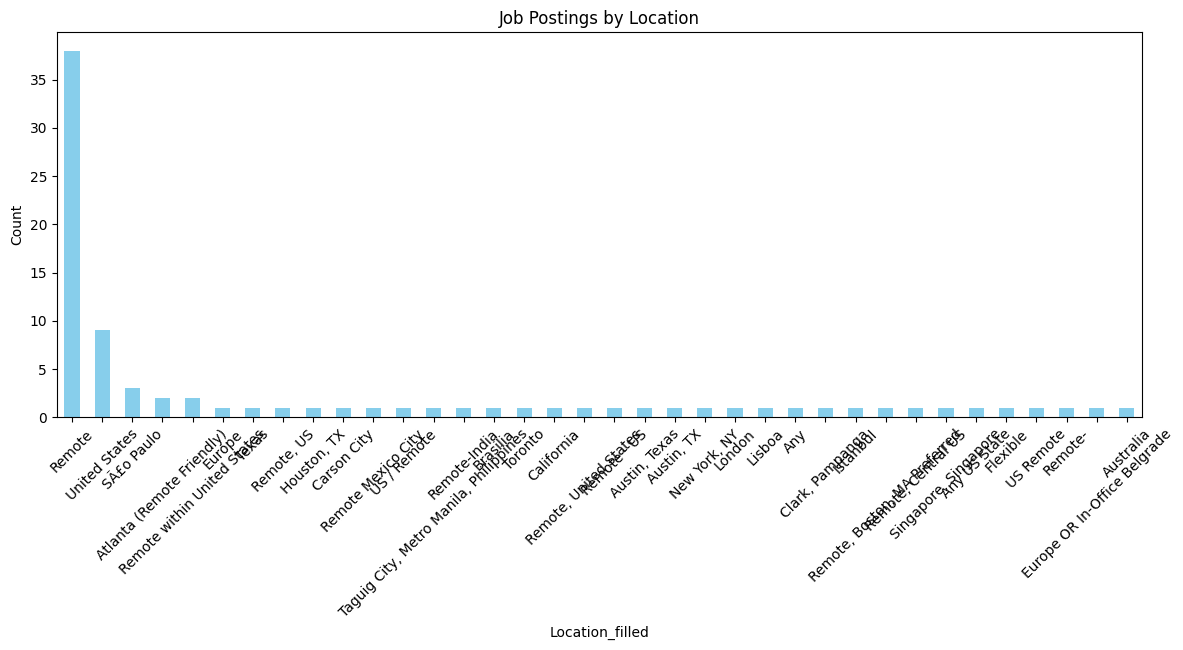

In [17]:
plt.figure(figsize=(14,5))
location_counts.plot(kind='bar', color='skyblue')
plt.title("Job Postings by Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [18]:
jobs_per_day = df.groupby(df['Date'].dt.date).size()

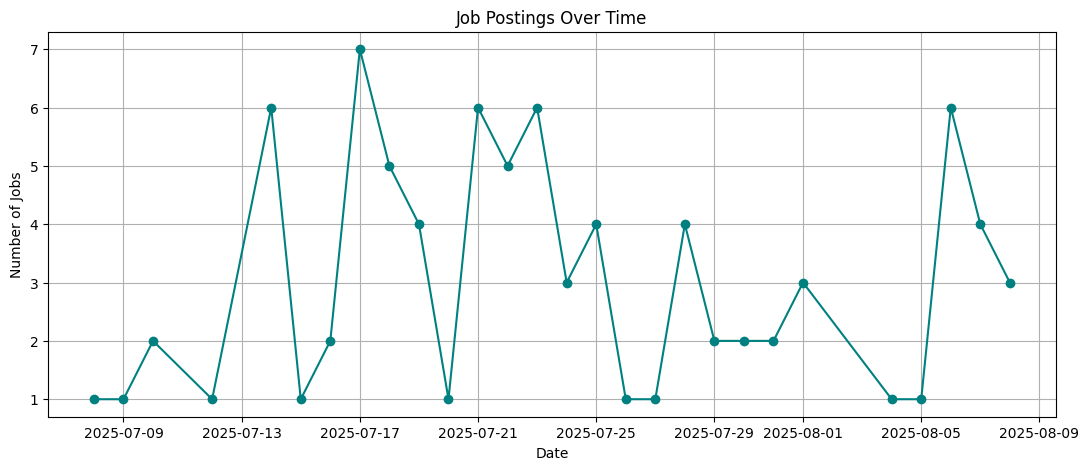

In [19]:
plt.figure(figsize=(13,5))
jobs_per_day.plot(kind='line', marker='o', color='teal')
plt.title("Job Postings Over Time")
plt.ylabel("Number of Jobs")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [20]:
top_companies = df['Company'].value_counts().head(10)
print("Top companies hiring:\n", top_companies)

Top companies hiring:
 Company
CloudWalk                          4
CoinGecko                          2
The Block                          2
Aprio                              2
Melapress                          2
Greenlight Financial Technology    2
Coins.ph                           2
Anchorage Digital                  2
FetLife                            2
Arbitrum Foundation                1
Name: count, dtype: int64


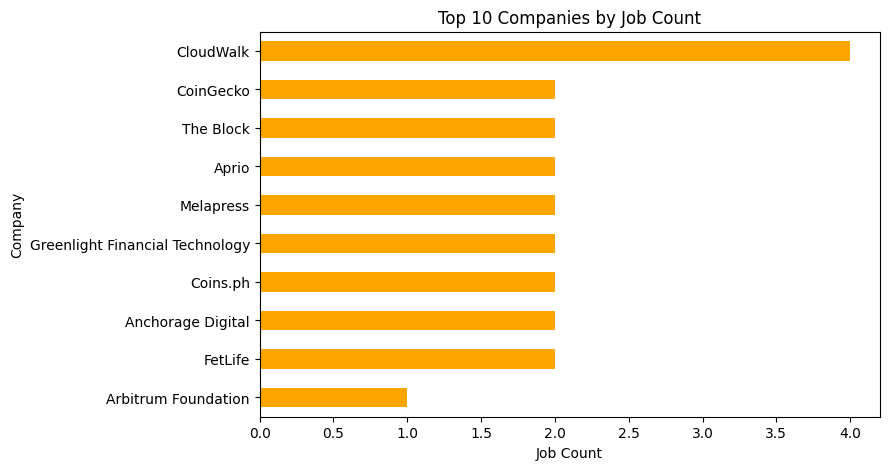

In [21]:
plt.figure(figsize=(8,5))
top_companies.plot(kind='barh', color='orange')
plt.title("Top 10 Companies by Job Count")
plt.xlabel("Job Count")
plt.gca().invert_yaxis()
plt.show()

 **💻 Remote work insights**  
We'll see how many postings are remote vs on-site/other.

In [22]:
df['Remote_flag'] = df['Location_filled'].str.contains("Remote", case=False, na=False)
remote_counts = df['Remote_flag'].value_counts()

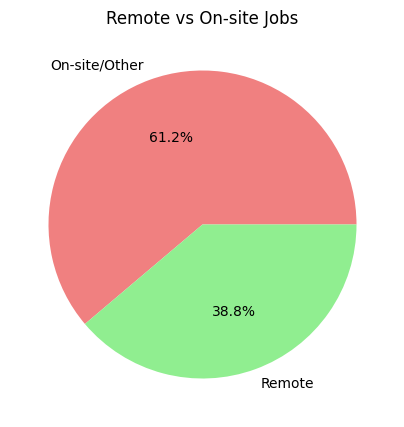

In [23]:
plt.figure(figsize=(5,5))
remote_counts.plot(kind='pie', labels=['On-site/Other', 'Remote'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title("Remote vs On-site Jobs")
plt.ylabel("")
plt.show()